<a id='About'></a>
## About ##
​The National Transport Safety Board (NTSB) aviation accident database contains civil aviation accidents and selected incidents that occurred from 1962 to present within the United States, its territories and possessions, and in international waters. Foreign investigations in which the NTSB participated as an accredited representative will also be listed.  
Data description:
- _Event.Id:_ ID of the aviation event
- _Investigation.Type:_ Determination of avaiation accident. Types are: Accident, Incident, and Occurrence
- _Accident.Number:_ Number of the aviation accident
- _Event.Date:_ The date of the event
- _Location:_ The location in which the event took place
- _Country:_ The country in which the event took place
- _Latitude:_ Latitude where the event took place
- _Longitude:_ Longitude where the event took place
- _Airport.Code:_ Airport code if the event took place within 3 miles of an airport, or the involved aircraft was
taking off from, or on approach to, an airport
- _Airport.Name:_ Airport name if the event took place within 3 miles of an airport, or the involved aircraft was
taking off from, or on approach to, an airport
- _Injury.Severity:_ Type of injury
- _Aircraft.damage:_ Damage level of the involved aircraft
- _Aircraft.Category:_ The category of the involved aircraft
- _Registration.Number:_ The full registration (tail) number of the involved aircraft, including the International Civil Aviation Organization (ICAO) country prefix
- _Make:_ Name of the manufacturer of the involved aircraft
- _Model:_ The full alphanumeric aircraft model code, including any applicable series or derivative
identifiers
- _Amateur.Built:_ Aircraft is a homebuilt (true/false)
- _Number.of.Engines:_ The total number of engines on the accident aircraft
- _Engine.Type:_ A variety of engine types
- _FAR.Description:_ Federal Aviation Regulations description. The applicable regulation part (14 CFR) or authority the aircraft was operating under at the time of the accident
- _Schedule:_ If the accident aircraft was conducting air carrier operations under 14 CFR 121, 125, 129, or
135, indicate whether it was operating as a "scheduled or commuter" air carrier or as a "nonscheduled or air taxi" carrier
- _Purpose.of.flight:_ The purpose of the flight such as Personal, Business, Aerial application and Firefighting flights
- _Air.carrier:_ The organization that operates the involved aircraft
- _Total.Fatal.Injuries:_ Total number of fatal injuries. Fatal injury means any injury which results in death within 30 days of the accident
- _Total.Serious.Injuries:_ Total number of serious injuries
- _Total.Minor.Injuries:_ Total number of minor injuries
- _Total.Uninjured:_ Total number of uninjured
- _Weather.Condition:_ Meteorological Conditions. IMC (Instrument meteorological conditions) and VMC (Visual meteorological conditions)
- _Broad.phase.of.flight:_ Stage of the flight when the event took place
- _Report.Status:_ General status of the investigation
- _Publication.Date:_ The date the investigation report was originally published


<a id='Business Problem'></a>
## Business Problem
The client is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.  
Our  task is to determine which aircraft are the lowest risk for the company to start this new business endeavor.  
Client needs three concrete recommendations with findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase. 

## Data Understanding
TBD

**Table of contents**  
1. [About](#about)
2. [Business problem & Data understanding](#business-problem)
3. [Data preprocessing](#data-preprocessing)
- 3.1. [Exploring data](#exploring-data)
- 3.2. [Data preparation](#data-preparation)
4. [Exploratory data analysis](#exploratory-data-analysis)
- 4.1. [General data analysis](#general-data-analysis)
- 4.2. [Data analysis for reccommendations](#data-analysis-for-recommendations)
5. [Summary](#summary)

## Data Preprocessing

### Exploring Data

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


In [3]:
df = pd.read_csv('data/AviationData.csv', encoding='latin-1')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50248 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
df.isna().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38641
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i

In [6]:
round((df.isna().sum().sort_values(ascending = False) / df.shape[0] * 100), 2).to_frame("%")

,%
Schedule,85.85
Air.carrier,81.27
FAR.Description,63.97
Aircraft.Category,63.68
Longitude,61.33
Latitude,61.32
Airport.Code,43.47
Airport.Name,40.61
Broad.phase.of.flight,30.56
Publication.Date,15.49


In [7]:
df.duplicated().sum()

0

1. We have a dataset of 88889 rows and 31 columns
2. 5 columns have float64 data type, 26 columns - object data type
3. No duplicates found
4. Uninformative columns (based on our task) to be deleted.  
Such as: Schedule, Air.carrier, FAR.Description, Airport.Code, Airport.Name, Publication.Date, Purpose.of.flight, Registration.Number, Longitude, Latitude, Location, Country, Report.Status
4. Accident.Number duplicates Event.Id. Accident.Number to be deleted
4. Injury.Severity duplicates Total.Fatal.Injuries, Total.Minor.Injuries, Total.Serious.Injuries  
and Total.Uninjured. Injury.Severity to be deleted
4. Data in dataframe to be converted into lowercase type where needed
5. Name of columns to be converted into snake style
6. Column Event.Date to be converted to datetime type
8. Columns: Number.of.Engines,Total.Fatal.Injuries, Iotal.Minor.Injuries, Total.Serious.Injuries, Total.Uninjured  to be converted to integer data type
11. Almost all the columns, except Event.Date, Accident.Number, Investigation.Type ,Event.Id, have missing values. Analyse them and find solution for missing values
12. Add new columns if needed






### Data Preparation

Dropping all the non-informative columns

In [8]:
df = df.drop(['Accident.Number', 'Schedule', 'Air.carrier',
              'FAR.Description', 'Airport.Code', 'Airport.Name',
              'Publication.Date', 'Purpose.of.flight', 
              'Registration.Number', 
              'Longitude', 'Latitude', 'Report.Status',
              'Location', 'Country', 'Injury.Severity'], axis=1)

Correcting names of the columns

In [9]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('.', '_')

Converting column 'event_date' to datetime data type

In [10]:
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')

Extracting the year, month, and day components from 'event_date'  
Adding new columns

In [11]:

df['event_year'] = df['event_date'].dt.year
df['event_month'] = df['event_date'].dt.month
df['event_day'] = df['event_date'].dt.dayofweek

In [12]:
df.head()

,event_id,investigation_type,event_date,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,event_year,event_month,event_day
0,20001218X45444,Accident,1948-10-24,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,1948,10,6
1,20001218X45447,Accident,1962-07-19,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,1962,7,3
2,20061025X01555,Accident,1974-08-30,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,1974,8,4
3,20001218X45448,Accident,1977-06-19,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,1977,6,6
4,20041105X01764,Accident,1979-08-02,Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,1979,8,3


Checking unique values of the dataframe columns

In [13]:
for index in df:
    print(index,":", df[index].unique())

event_id : ['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513']
investigation_type : ['Accident' 'Incident']
event_date : ['1948-10-24T00:00:00.000000000' '1962-07-19T00:00:00.000000000'
 '1974-08-30T00:00:00.000000000' ... '2022-12-22T00:00:00.000000000'
 '2022-12-26T00:00:00.000000000' '2022-12-29T00:00:00.000000000']
aircraft_damage : ['Destroyed' 'Substantial' 'Minor' nan 'Unknown']
aircraft_category : [nan 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket' 'WSFT' 'UNK' 'ULTR']
make : ['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']
model : ['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']
amateur_built : ['No' 'Yes' nan]
number_of_engines : [ 1. nan  2.  0.  3.  4.  8.  6.]
engine_type : ['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Je

Droppin missing values in 'amateur_built'

In [14]:
df['amateur_built'] = df['amateur_built'].dropna()

Converting strings in 'weather_condition' into lowercase

In [15]:
df['weather_condition'] = df['weather_condition'].str.lower()

In [16]:
df['weather_condition'].unique()

array(['unk', 'imc', 'vmc', nan], dtype=object)

Filling up missing values with "unk"(Unknown) value

In [17]:
df['weather_condition'] = df['weather_condition'].fillna('unk')

Filling missing values of 'broad_phase_of_flight' with 'Unknown' value

In [18]:
df['broad_phase_of_flight'] = df['broad_phase_of_flight'].fillna('Unknown')

Exploring missing values of 'make'

In [19]:
df['make'].value_counts().head(10)

Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: make, dtype: int64

Converting to lower type to avoid duplicates

In [20]:
df['make'] = df['make'].str.lower()

Dropping missing values

In [21]:
df.dropna(subset=['make'], inplace=True)

Exploring missing values of 'model'

In [22]:
df['model'].value_counts()

152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
Aerostar 600        1
SGU-22              1
MU2-2B-25           1
ZENITH CH-300       1
Mark 6              1
Name: model, Length: 12310, dtype: int64

Converting to lower type to avoid duplicates

In [23]:
df['model'] = df['model'].str.lower()

Dropping missing values

In [24]:
df.dropna(subset=['model'], inplace=True)

Exploring missing values of 'aircraft_damage'

In [25]:
df['aircraft_damage'].value_counts()

Substantial    64097
Destroyed      18597
Minor           2792
Unknown          119
Name: aircraft_damage, dtype: int64

Filling  missing values with 'Unknown' value

In [26]:
df['aircraft_damage'] = df['aircraft_damage'].fillna('Unknown')

Dropping all missing values in 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured'

In [27]:
df = df.dropna(subset=['total_fatal_injuries', 'total_serious_injuries', 
                       'total_minor_injuries', 'total_uninjured'])

Converting the columns above into integer data type

In [28]:
df['total_fatal_injuries'] = df['total_fatal_injuries'].astype('int64')
df['total_serious_injuries'] = df['total_serious_injuries'].astype('int64')
df['total_minor_injuries'] = df['total_minor_injuries'].astype('int64')
df['total_uninjured'] = df['total_uninjured'].astype('int64')

Checking how many airplanes we have before cleaning 

In [29]:
airplane_before = df['aircraft_category'].value_counts()
airplane_before

Airplane             24115
Helicopter            2999
Glider                 420
Balloon                192
Weight-Shift           161
Gyrocraft              153
Powered Parachute       91
Ultralight              24
Unknown                 14
WSFT                     9
UNK                      2
Powered-Lift             2
Blimp                    1
ULTR                     1
Rocket                   1
Name: aircraft_category, dtype: int64

Defining a function that is going to fill up missing values of 'aircraft_category' based on mode value in 'model' 

In [30]:
def aircraft(row):
    if type(row['aircraft_category']) == str:
        return row['aircraft_category']

    else:
        mode_aircraft = df.loc[df['model'] == row['model'], 'aircraft_category'].mode()
        return mode_aircraft.iloc[0] if not mode_aircraft.empty else 'Unknown'


Apply the function to each row

In [31]:
df['aircraft_category'] = df.apply(aircraft, axis=1)

Checking how many airplanes we have after cleaning the correspondent column

In [32]:
airplane_after = df['aircraft_category'].value_counts()
airplane_after

Airplane             59253
Unknown               7197
Helicopter            6073
Glider                 820
Balloon                393
Gyrocraft              230
Weight-Shift           169
Powered Parachute       92
Ultralight              27
WSFT                     9
UNK                      2
Powered-Lift             2
Blimp                    1
ULTR                     1
Rocket                   1
Name: aircraft_category, dtype: int64

In [33]:
print("before:", airplane_before.index[0], airplane_before.values[0])
print("after:", airplane_after.index[0], airplane_after.values[0])
print("change ratio:", round((airplane_after.values[0] / airplane_before.values[0]), 2))

before: Airplane 24115
after: Airplane 59253
change ratio: 2.46


Defining a function that is going to fill up missing values of 'number_of_engines' based on mean value in 'model' 

In [34]:
def numbers(row):
    if row['number_of_engines'] >= 0:
        return row['number_of_engines']

    else:
        mean_engines = df.loc[df['model'] == row['model'], 'number_of_engines'].mean()
        return round(mean_engines) if not np.isnan(mean_engines) else 'Unknown'

Apply the function to each row

In [35]:
df['number_of_engines'] = df.apply(numbers, axis=1)

Converting data into integer data type

In [36]:
df['number_of_engines'] = df['number_of_engines'] != 'Unknown'
df['number_of_engines'] = df['number_of_engines'].astype('int64')

Defining a function that is going to fill up missing values of 'engine_type' based on mode value in 'model'.  


In [37]:
def engines(row):
    if type(row['engine_type']) == str:
        return row['engine_type']

    else:
        mode_engine = df.loc[df['model'] == row['model'], 'engine_type'].mode()
        return mode_engine.iloc[0] if not mode_engine.empty else 'Unknown'


Apply the function to each row

In [38]:
df['engine_type'] = df.apply(engines, axis=1)

In [39]:
df.isna().sum()

event_id                  0
investigation_type        0
event_date                0
aircraft_damage           0
aircraft_category         0
make                      0
model                     0
amateur_built             1
number_of_engines         0
engine_type               0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
event_year                0
event_month               0
event_day                 0
dtype: int64

Cheking whether we have duplicates after we have processed data

In [40]:
df.duplicated().sum()

25

In [41]:
df = df.drop_duplicates()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74245 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                74245 non-null  object        
 1   investigation_type      74245 non-null  object        
 2   event_date              74245 non-null  datetime64[ns]
 3   aircraft_damage         74245 non-null  object        
 4   aircraft_category       74245 non-null  object        
 5   make                    74245 non-null  object        
 6   model                   74245 non-null  object        
 7   amateur_built           74244 non-null  object        
 8   number_of_engines       74245 non-null  int64         
 9   engine_type             74245 non-null  object        
 10  total_fatal_injuries    74245 non-null  int64         
 11  total_serious_injuries  74245 non-null  int64         
 12  total_minor_injuries    74245 non-null  int64 

- The uninformative columns were dropped
- Names of the columns were converted to snake style
- 'event_date' was converted to datetime data
- 'event_year', 'event_month', 'event_day' were created
- 'weather_condition', 'aircraft_damage', 'broad_phase_of_flight'  
missing values were filled with 'unknown' value
- missing values of 'make' and 'model' were dropped.  
all the values were converted to lower in order to avoid duplicates
- 'aircraft_category', 'engine_type' missing values were filled with mode value in 'model'
- 'number_of_engines' missing values were filled with mean value in 'model'.  
- 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries',  
 'total_uninjured', 'number_of_engines' were converted to integer data type
- duplicated rows were dropped


## Exploratory Data Analysis

Copy data for analysis

In [43]:
df_clean = df.copy()

### General Data Analysis

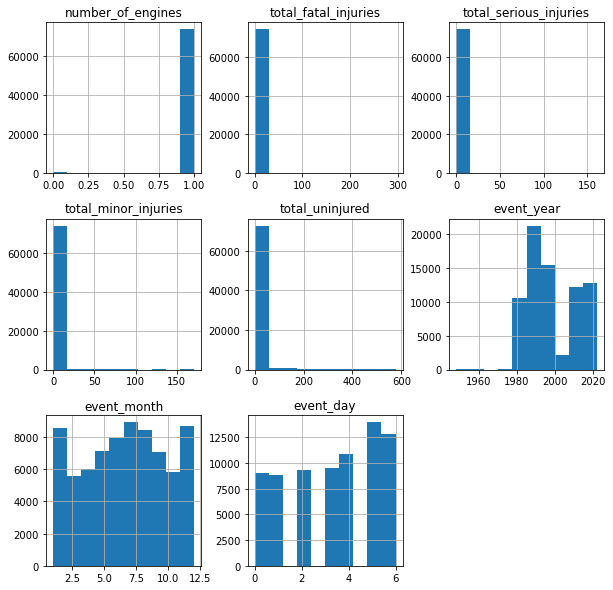

In [44]:

df_clean.hist(figsize=(10,10));

In [45]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_engines,74245.0,0.988605,0.106137,0.0,1.0,1.0,1.0,1.0
total_fatal_injuries,74245.0,0.506000,4.217235,0.0,0.0,0.0,0.0,295.0
total_serious_injuries,74245.0,0.243518,1.467668,0.0,0.0,0.0,0.0,161.0
total_minor_injuries,74245.0,0.300114,1.538765,0.0,0.0,0.0,0.0,171.0
total_uninjured,74245.0,4.783016,26.019085,0.0,0.0,1.0,2.0,576.0
event_year,74245.0,1998.368658,12.755895,1948.0,1987.0,1995.0,2011.0,2022.0
event_month,74245.0,6.588471,3.054134,1.0,4.0,7.0,9.0,12.0
event_day,74245.0,3.312048,2.009736,0.0,2.0,4.0,5.0,6.0


In [46]:
df_clean.describe(include=[object]).T

,count,unique,top,freq
event_id,74245,73535,20001212X19172,3
investigation_type,74245,2,Accident,71055
aircraft_damage,74245,4,Substantial,53425
aircraft_category,74245,15,Airplane,59237
make,74245,6354,cessna,23007
model,74245,10225,152,2119
amateur_built,74244,2,No,67421
engine_type,74245,13,Reciprocating,61484
weather_condition,74245,3,vmc,64341
broad_phase_of_flight,74245,12,Unknown,26228


In [47]:
df_clean.corr().T

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,event_year,event_month,event_day
number_of_engines,1.000000,-0.043059,-0.019713,-0.003802,-0.020336,-0.078675,-0.004993,-0.007704
total_fatal_injuries,-0.043059,1.000000,0.088754,0.069283,-0.016837,0.013280,0.001777,-0.003714
total_serious_injuries,-0.019713,0.088754,1.000000,0.308762,0.049140,0.026192,0.005395,0.002426
total_minor_injuries,-0.003802,0.069283,0.308762,1.000000,0.142011,-0.039107,0.009084,0.000858
total_uninjured,-0.020336,-0.016837,0.049140,0.142011,1.000000,0.034518,-0.003379,-0.022548
event_year,-0.078675,0.013280,0.026192,-0.039107,0.034518,1.000000,0.007589,-0.030394
event_month,-0.004993,0.001777,0.005395,0.009084,-0.003379,0.007589,1.000000,0.003398
event_day,-0.007704,-0.003714,0.002426,0.000858,-0.022548,-0.030394,0.003398,1.000000


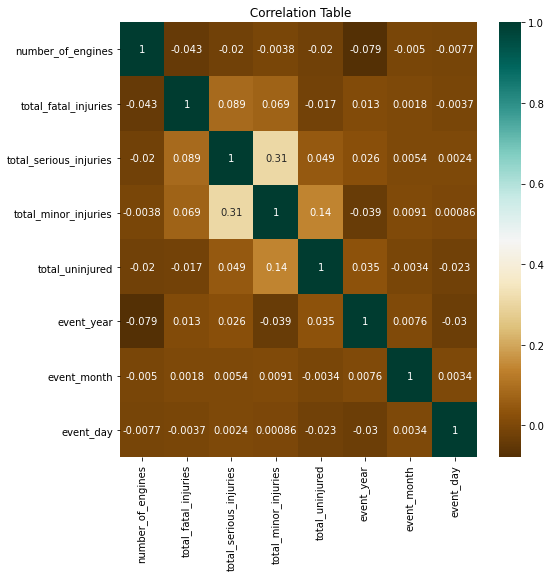

In [48]:
plt.figure(figsize=(8,8))
sns.heatmap(df_clean.corr(), annot=True,cmap='BrBG')
plt.title(' Correlation Table');

Based on general analysis, we can conclude that:
- There is no clear correlation between values
- There is an abrupt decline of aircraft events after 2001 that is related with 9/11

The picture of an average aircraft event looks as below:
- It took place in 1998 in June-July in the middle of week under Visual meteorological conditions
- It was a Cessna 152 airplane with reciprocating (piston) engine that was used for personal or training purposes  
- The event was qualified as an accident with substantial aircraft damage with 1 fatal unjury
- No clear ackowledgement during which broad phase of flight it happened


### Data Analysis for recommendations

 
Before starting Analysis, we adjust our dataset based on client's task.
1. The purchase of aircraft 
2. The type of aircraft is airplane
3. We choose top 10 commercial and private manufacturers based on revenue ([Source](https://assetsamerica.com/aircraft-manufacturers/)).  
Commercial manufactures that have private production are counted as commercial only.  
Due to Piper is a top in column 'make', we also include it in our private_top list

A successful production run = 15-20 years.  
Aircraft lifetime = 25-35 years.  
Based on this information we explore data from 2003-01-01

In [49]:
df_clean = df_clean[df_clean['event_date'] > '2003-01-01']

Selecting only airplane

In [50]:
df_clean = df_clean[df_clean['aircraft_category'] == 'Airplane']

Selecting only no homebuilt

In [51]:
df_clean = df_clean[df_clean['amateur_built'] == 'No']

Defining function that finds implicit duplicates in 'make' column

In [52]:
def filter_make(word):
    filtered_df = df_clean[df_clean['make'].str.contains(word, case=False, na=False)]
    return print(filtered_df['make'].value_counts())

In [53]:
filter_make('boeing')
filter_make('airbus')
filter_make('embraer')
filter_make('bombardier')
filter_make('mitsubishi')
filter_make('uac')
filter_make('aviastar')
filter_make('kapa')
filter_make('gipps')
filter_make('beech')
filter_make('ces')
filter_make('dassault')
filter_make('gulfstream')
filter_make('piper')



boeing                            1246
the boeing company                   9
boeing company                       9
boeing company, long beach div       1
boeing of canada/dehav div           1
boeing 777-306er                     1
boeing-stearman                      1
boeing commercial airplane gro       1
boeing (stearman)                    1
Name: make, dtype: int64
airbus              249
airbus industrie     32
Name: make, dtype: int64
embraer                           144
embraer s a                         9
embraer-empresa brasileira de       6
embraer s.a.                        2
embraer executive aircraft inc      1
embraer aircraft                    1
embraer sa                          1
Name: make, dtype: int64
bombardier inc              68
bombardier                  53
bombardier, inc.             7
bombardier learjet corp.     1
bombardier canadair          1
Name: make, dtype: int64
mitsubishi    18
Name: make, dtype: int64
Series([], Name: make, dtype: int64)
S

Among top 10 commercial manufacturers only 5 are presented in actual dataset.  
The rest 5 are all international companies: 
- Comac: China, Shanghai. No commercial flights outside China yet.
- UAC, Aviastar_SP, KAPA: Russia. No international commercial flights.
- GippsAero: Australia. In 2021 converted into a Spares and Support Organization.

In [54]:
commercial_top_5 = ['boeing', 'airbus', 'embraer', 
                    'bombardier', 'mitsubishi']
private_top_5 = ['beechcraft', 'cessna', 'dassault aviation', 
                    'gulfstream aerospace', 'piper']

Replacing implicit dublicates

In [55]:
def duplicates_make(row):
    try:
        if 'boeing' in row:
            return 'boeing'
        elif 'airbus' in row:
            return 'airbus'
        elif 'embraer' in row:
            return 'embraer'
        elif 'bombardier' in row:
            return 'bombardier'
        elif 'mitsubishi' in row:
            return 'mitsubishi'
        elif 'beech' in row:
            return 'beechcraft'
        elif 'cessna' in row:
            return 'cessna'
        elif 'dassault' in row:
            return 'dassault'
        elif 'gulfstream' in row:
            return 'gulfstream'
        elif 'piper' in row:
            return 'piper'
    except:
        return 'others'

In [56]:
df_clean['make_top'] = df_clean['make'].apply(duplicates_make)
df_clean['make_top'].value_counts()

cessna        6006
piper         3524
beechcraft    1341
boeing        1270
airbus         281
embraer        164
bombardier     130
gulfstream      74
dassault        18
mitsubishi      18
Name: make_top, dtype: int64

In [57]:
df_clean = df_clean.dropna(subset=['make_top'], axis=0)
df_clean = df_clean[df_clean['make_top'] != "others"]

In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12826 entries, 54065 to 88888
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                12826 non-null  object        
 1   investigation_type      12826 non-null  object        
 2   event_date              12826 non-null  datetime64[ns]
 3   aircraft_damage         12826 non-null  object        
 4   aircraft_category       12826 non-null  object        
 5   make                    12826 non-null  object        
 6   model                   12826 non-null  object        
 7   amateur_built           12826 non-null  object        
 8   number_of_engines       12826 non-null  int64         
 9   engine_type             12826 non-null  object        
 10  total_fatal_injuries    12826 non-null  int64         
 11  total_serious_injuries  12826 non-null  int64         
 12  total_minor_injuries    12826 non-null  in

Creating column 'make_type' to separate private and commercial manufacturers

In [78]:
df_clean['make_type'] = df_clean['make_top'].apply(lambda x: 'commercial' if x in commercial_top_5 else 'private' if x in private_top_5 else 'other')
df_clean['make_type'].value_counts()

private       10871
commercial     1863
other            92
Name: make_type, dtype: int64

Creating column 'total onboard' to calculate percentage of fatalities 

In [79]:
df_clean['total_onboard'] = df_clean['total_fatal_injuries'] + df_clean['total_serious_injuries'] + df_clean['total_minor_injuries'] + df_clean['total_uninjured']

In [80]:
df_clean['fatal_percentage'] = df_clean["total_fatal_injuries"]/df_clean['total_onboard'] * 100
df_clean['fatal_percentage'].describe()

count    12016.000000
mean        18.525374
std         37.841670
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: fatal_percentage, dtype: float64

creating a dataframe containing only the private airplanes we're interested in, and a commercial one

In [93]:
df_commericial = df_clean[df_clean['make_type'] == 'commercial']
df_private = df_clean[df_clean['make_type']== 'private']

# Data Analysis

## Consumer & Private Airplane Fatalities


In [81]:
df_clean['make_top'].value_counts()

cessna        6006
piper         3524
beechcraft    1341
boeing        1270
airbus         281
embraer        164
bombardier     130
gulfstream      74
dassault        18
mitsubishi      18
Name: make_top, dtype: int64

In [99]:
#fatality percentage of all commercial accidents: 
print(df_commericial['fatal_percentage'].describe())
print(df_commericial['total_onboard'].describe())

count    1202.000000
mean        6.639752
std        24.241885
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: fatal_percentage, dtype: float64
count    1863.000000
mean       67.117552
std        91.420680
min         0.000000
25%         0.000000
50%         4.000000
75%       133.000000
max       576.000000
Name: total_onboard, dtype: float64


Finding 1:
Out of 1202 Commercial Airplane accidents, there is a mean of a 6% fatality rate, and a standard deviation of 24%.
This is fairly low fatality rate given the typical larger amounts of passengers onboard these aircrafts 
(the mean people onboard is 67)

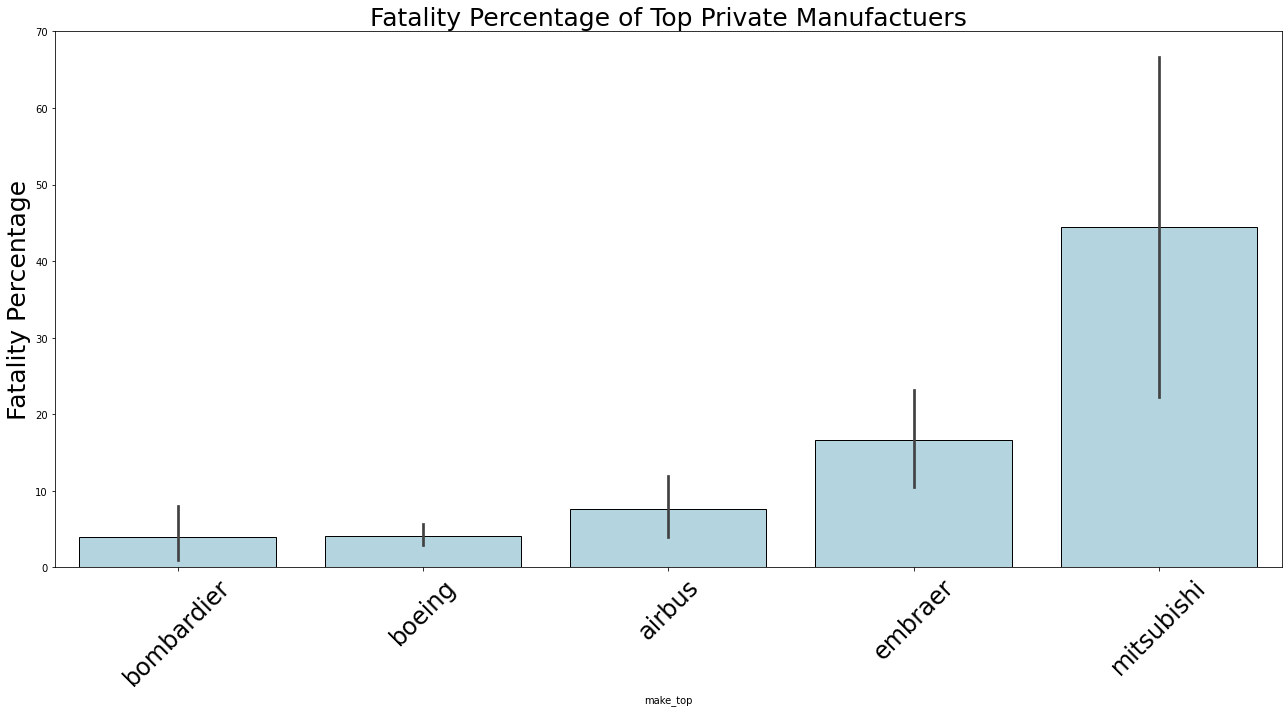

In [139]:
##
fig, ax = plt.subplots(figsize=(18, 10))
fatal_percent = df_commericial['fatal_percentage']
total_onboard = df_commericial['total_onboard']

make_top = df_commericial['make_top']
sns.barplot(x=make_top, y=fatal_percent, edgecolor='black', linewidth=1, color='lightblue', )
ax.set_ylabel('Fatality Percentage', fontsize=25)
ax.set_title("Fatality Percentage of Top Private Manufactuers", fontsize=25)
ax.grid(False);
plt.setp(ax.get_xticklabels(),fontsize=24, rotation=45)
plt.tight_layout()


Recommendation 1: We would recommend to choose bombardier as the manufacturer as there is the highest protection percentage out of all the other manufacturers. 

In [140]:
print(df_private['fatal_percentage'].describe())
print(df_private['total_onboard'].describe())

count    10729.000000
mean        19.831290
std         38.826957
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: fatal_percentage, dtype: float64
count    10871.000000
mean         2.046178
std          2.052369
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max        124.000000
Name: total_onboard, dtype: float64


Finding 2: Out of 10729 Commercial Airplane accidents, there is a mean of a 19% fatality rate, and a standard deviation of 38%.
This is a higher fatality rate but this is due the lesser amount of people usually on these aircrafts. 19% is still a decent protection rate given mean amount of passengers is 2 per accident.

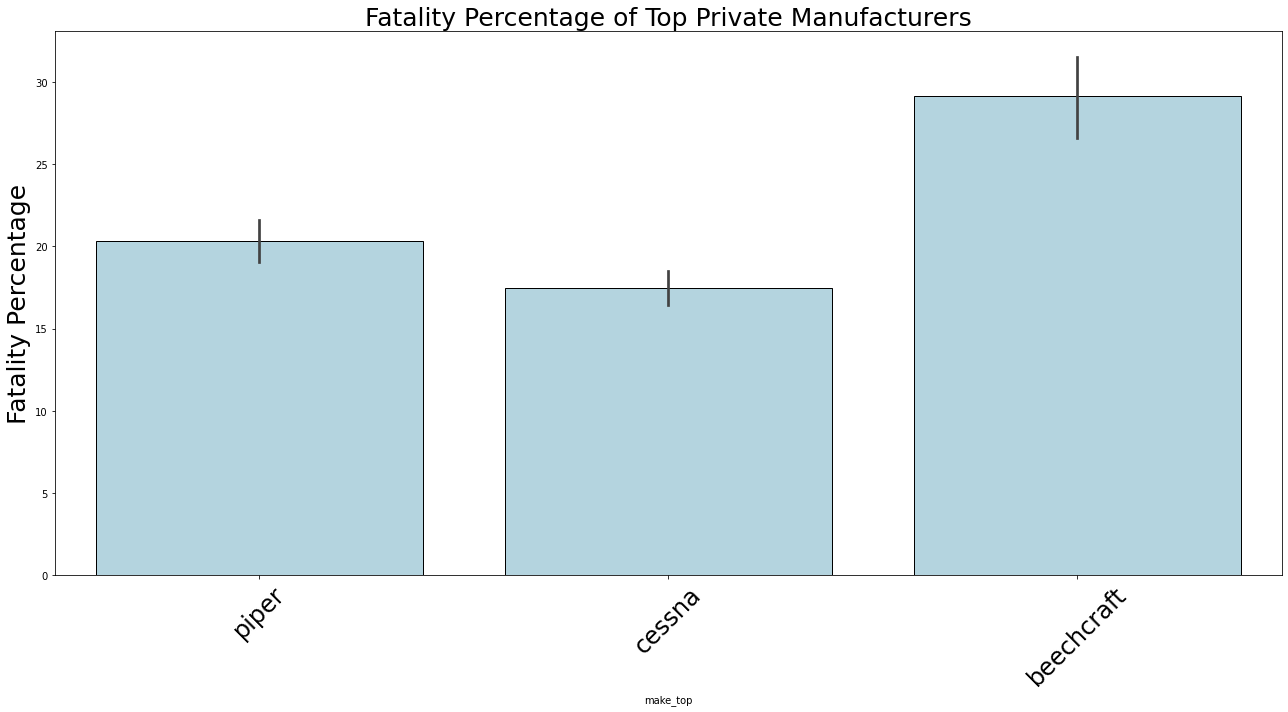

In [141]:
fig, ax = plt.subplots(figsize=(18, 10))
fatal_percent = df_private['fatal_percentage']
total_onboard = df_private['total_onboard']

make_top = df_private['make_top']
sns.barplot(x=make_top, y=fatal_percent, edgecolor='black', color='lightblue')
ax.set_ylabel('Fatality Percentage', fontsize=25)
ax.set_title("Fatality Percentage of Top Private Manufacturers", fontsize=25)
ax.grid(False);
plt.setp(ax.get_xticklabels(),fontsize=24, rotation=45)
plt.tight_layout()

Recommendation 2: We would recommend to choose cessna as the manufacturer as there is the highest protection percentage out of all the other manufacturers. 

## Summary